In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df=pd.read_csv('/content/drive/MyDrive/datasets/DS Mostafa Othman dataset/feature engineer dataset/stackoverflow-dirty - stackoverflow-dirty.csv')
df.sample(3)

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
423,8/3/18 5:31,Some college/university study without earning ...,NaN,Yes,USA,NaN,Git,62,5,NaN,NaN
474,8/19/18 8:04,Bachelor's degree (BA. BS. B.Eng.. etc.),30840.0,Yes,South Africa,NaN,Git;Subversion;Zip file back-ups,18,17,Female,"30,840.00"
834,6/19/18 18:39,Some college/university study without earning ...,240000.0,Yes,USA,6.0,Git;Mercurial,41,11,Male,"$240,000.00"


## Handling Missing Data

In [91]:
df.isnull().sum()

,0
SurveyDate,0
FormalEducation,0
ConvertedSalary,334
Hobby,0
Country,0
StackOverflowJobsRecommend,512
VersionControl,0
Age,0
Years Experience,0
Gender,306


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


<Axes: >

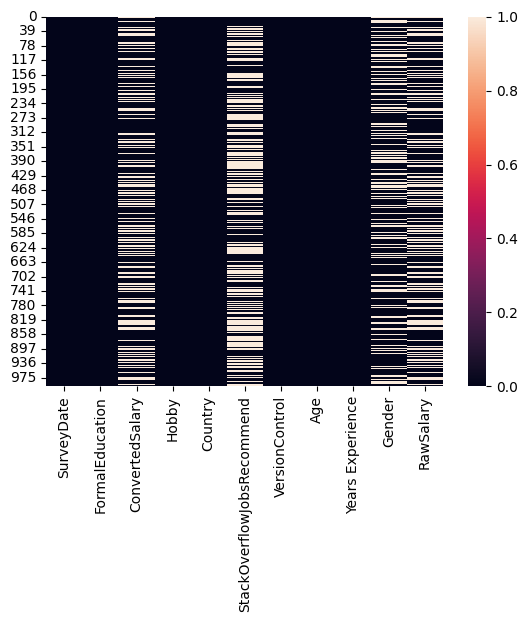

In [93]:
sns.heatmap(df.isnull())

In [94]:
df.drop(columns='RawSalary',inplace=True)

In [95]:
df[['ConvertedSalary','Age','Years Experience']].describe()


,ConvertedSalary,Age,Years Experience
count,6.650000e+02,999.000000,999.000000
mean,9.256517e+04,36.003003,9.961962
std,2.091344e+05,13.255127,4.878129
min,0.000000e+00,18.000000,0.000000
25%,2.755000e+04,25.000000,7.000000
50%,5.556200e+04,35.000000,10.000000
75%,8.823800e+04,45.000000,13.000000
max,2.000000e+06,83.000000,27.000000


<Axes: ylabel='ConvertedSalary'>

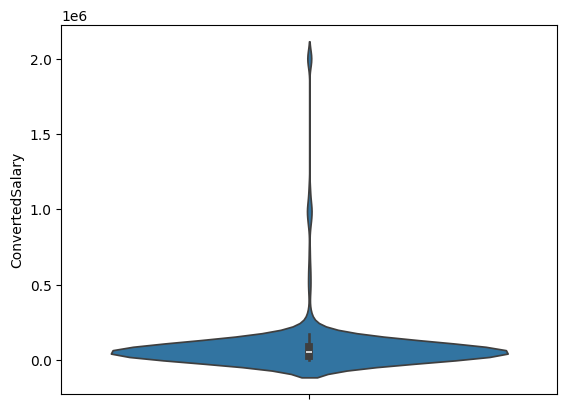

In [96]:
# df['ConvertedSalary'].plot(kind='box')
sns.violinplot(df['ConvertedSalary'])

####the target record is ConvertedSalary but there are missing vlues and also outliers

I have two option

    1. treating the outlier values so i could fill the missing values with mean of the values
    2. filling the missing values with the median values and this option make sence to me




#### filling the missing values by using sklearn

#### Treating the outliers values

In [97]:
Q1=df['ConvertedSalary'].quantile(0.25)
Q3=df['ConvertedSalary'].quantile(0.75)
IQR= Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound, upper_bound


(np.float64(-63482.0), np.float64(179270.0))

<Axes: ylabel='ConvertedSalary'>

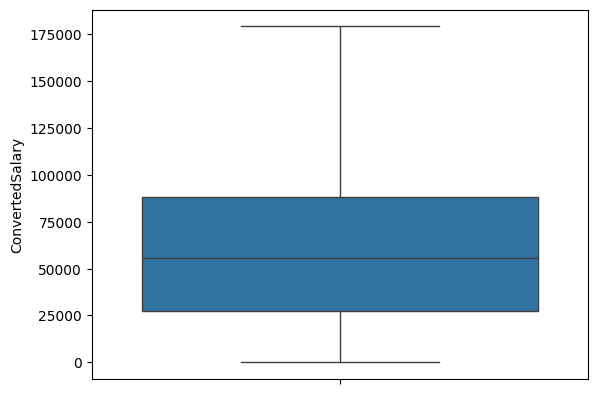

In [98]:
df['ConvertedSalary']=df['ConvertedSalary'].clip(lower_bound,upper_bound)
sns.boxplot(df['ConvertedSalary'])
# sns.violinplot(df['ConvertedSalary'])

<Axes: ylabel='ConvertedSalary'>

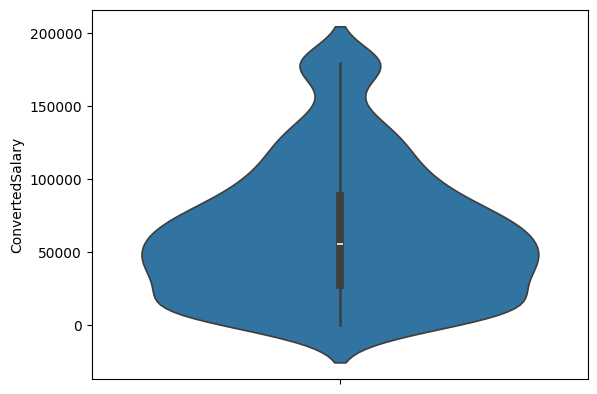

In [99]:
sns.violinplot(df['ConvertedSalary'])

<Axes: >

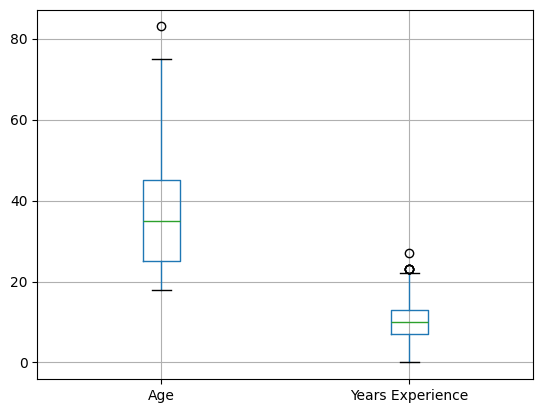

In [100]:
df.boxplot(column=['Age','Years Experience'])

In [101]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR= Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound, upper_bound

df['Age']=df['Age'].clip(lower_bound,upper_bound)


In [102]:
Q1=df['Years Experience'].quantile(0.25)
Q3=df['Years Experience'].quantile(0.75)
IQR= Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lower_bound, upper_bound

df['Years Experience']=df['Years Experience'].clip(lower_bound,upper_bound)


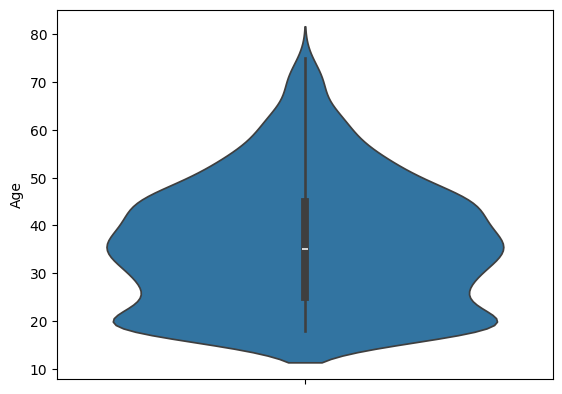

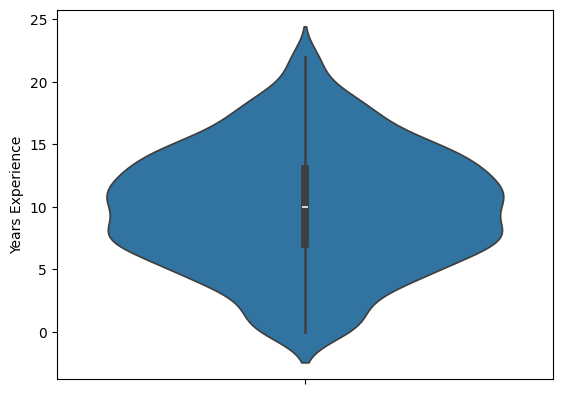

In [103]:
for column in ['Age', 'Years Experience']:
    sns.violinplot(df[column])
    plt.show()

#### Filling missing values by using sklearn

In [104]:
from sklearn.impute import MissingIndicator, SimpleImputer
miss=MissingIndicator()
miss.fit_transform(df[['ConvertedSalary']]).sum()


np.int64(334)

In [105]:
fillmean=SimpleImputer(strategy='mean')
df['ConvertedSalary']=fillmean.fit_transform(df[['ConvertedSalary']])
miss.fit_transform(df[['ConvertedSalary']]).sum()

np.int64(0)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

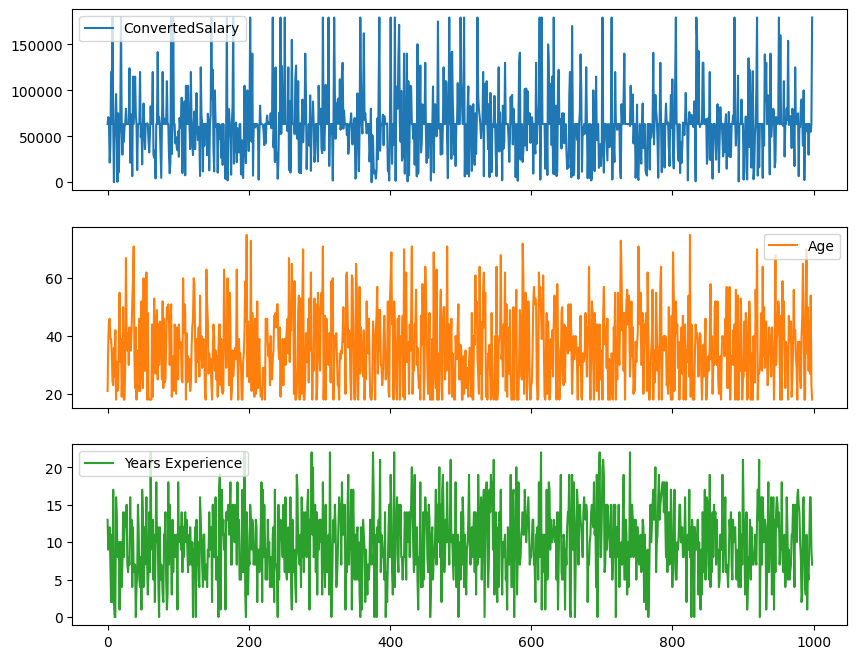

In [106]:
df[['ConvertedSalary','Age','Years Experience']].plot(subplots=True,figsize=(10,8))

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             999 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


#### Scalling the range of the values

In [108]:
df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,999.000000,487.000000,999.000000,999.000000
mean,63333.103759,7.061602,35.994995,9.951952
std,37939.447588,2.621591,13.229096,4.850231
min,0.000000,0.000000,18.000000,0.000000
25%,41641.500000,5.000000,25.000000,7.000000
50%,63333.103759,7.000000,35.000000,10.000000
75%,70000.000000,10.000000,45.000000,13.000000
max,179270.000000,10.000000,75.000000,22.000000


In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## standardscaler for more than 3 categories
stand=StandardScaler()
minmax=MinMaxScaler()
df['ConvertedSalary']=minmax.fit_transform(df[['ConvertedSalary']])
df['Years Experience']=minmax.fit_transform(df[['Years Experience']])
df['Age']=minmax.fit_transform(df[['Age']])


In [110]:
df['ConvertedSalary']

,ConvertedSalary
0,0.353283
1,0.395164
2,0.353283
3,0.119518
4,0.232448
...,...
994,0.353283
995,0.327696
996,0.306800
997,0.353283


In [111]:
df[['Age','FormalEducation','Country','VersionControl','Years Experience','Gender','ConvertedSalary']].sample(3)

,Age,FormalEducation,Country,VersionControl,Years Experience,Gender,ConvertedSalary
493,0.385965,Primary/elementary school,Spain,Git;Zip file back-ups,0.818182,Male,0.098332
844,0.333333,Bachelor's degree (BA. BS. B.Eng.. etc.),Russia,Team Foundation Version Control,0.272727,Male,0.725163
400,0.614035,Professional degree (JD. MD. etc.),France,Git;Zip file back-ups,0.363636,NaN,0.368628


In [112]:
df['Country'].value_counts()

,count
Country,
South Africa,166
USA,164
Spain,134
Sweeden,119
France,115
Russia,97
UK,95
India,95
Ukraine,9


In [113]:
from sklearn.preprocessing import LabelEncoder
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder for more than 3 categories
label=LabelEncoder()
df['Country_encoded']=label.fit_transform(df['Country'])
df[['Country','Country_encoded']].drop_duplicates()
'''
label_encoders = {}
country_le = LabelEncoder()

df['Country_encoded'] = country_le.fit_transform(df['Country'])
label_encoders['Country'] = country_le

print("LabelEncoder for 'Country' has been stored in 'label_encoders['Country']'.")
print("You can access the original labels via its '.classes_' attribute.")
print("For example, the mapping from encoded integer to original country is:")
print({idx: label for idx, label in enumerate(country_le.classes_)})

# --- How to use the stored encoder to retrieve original values ---
# To retrieve an original value from an encoded value, for instance, for an encoded_value = 4:
# original_country = label_encoders['Country'].inverse_transform([4])[0]
# print(f"\nExample: Original country for encoded value 4 is: {original_country}")

# You should apply a similar pattern for 'FormalEducation' and 'VersionControl'
# in their respective encoding cells to also store their LabelEncoder objects.

LabelEncoder for 'Country' has been stored in 'label_encoders['Country']'.
You can access the original labels via its '.classes_' attribute.
For example, the mapping from encoded integer to original country is:
{0: 'France', 1: 'India', 2: 'Ireland', 3: 'Russia', 4: 'South Africa', 5: 'Spain', 6: 'Sweeden', 7: 'UK', 8: 'USA', 9: 'Ukraine'}


In [114]:
df['FormalEducation'].value_counts()

,count
FormalEducation,
Bachelor's degree (BA. BS. B.Eng.. etc.),482
Master's degree (MA. MS. M.Eng.. MBA. etc.),241
Some college/university study without earning a degree,130
Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.),58
Associate degree,33
Other doctoral degree (Ph.D. Ed.D.. etc.),30
Professional degree (JD. MD. etc.),19
Primary/elementary school,5
I never completed any formal education,1


In [115]:
major_degrees = ['Bachelor\'s degree (BA. BS. B.Eng.. etc.)', 'Master\'s degree (MA. MS. M.Eng.. MBA. etc.)']
other_education_mask = ~df['FormalEducation'].isin(major_degrees)
other_education_values = df.loc[other_education_mask, 'FormalEducation'].unique().tolist()

# This cell was intended to get the 'other' education levels, so it should be used to define 'unique_other_education'
unique_other_education = other_education_values

In [116]:
df['FormalEducation'] = df['FormalEducation'].replace(unique_other_education, 'levels_low_Bsc')


In [117]:
df['FormalEducation'].value_counts()

,count
FormalEducation,
Bachelor's degree (BA. BS. B.Eng.. etc.),482
levels_low_Bsc,276
Master's degree (MA. MS. M.Eng.. MBA. etc.),241


In [118]:
'''
df['FormalEducation_encoded']=label.fit_transform(df['FormalEducation'])
df[['FormalEducation','FormalEducation_encoded']].drop_duplicates()
'''
label_encoders = {}
education_le = LabelEncoder()

df['FormalEducation'] = education_le.fit_transform(df['FormalEducation'])
label_encoders['FormalEducation'] = education_le

print("LabelEncoder for 'education' has been stored in 'label_encoders['education']'.")
print("You can access the original labels via its '.classes_' attribute.")
print("For example, the mapping from encoded integer to original country is:")
print({idx: label for idx, label in enumerate(education_le.classes_)})


LabelEncoder for 'education' has been stored in 'label_encoders['education']'.
You can access the original labels via its '.classes_' attribute.
For example, the mapping from encoded integer to original country is:
{0: "Bachelor's degree (BA. BS. B.Eng.. etc.)", 1: "Master's degree (MA. MS. M.Eng.. MBA. etc.)", 2: 'levels_low_Bsc'}


In [119]:
other_versions = df[df['VersionControl'] != 'Git']['VersionControl']
unique_other_versions = other_versions.unique().tolist()


In [120]:
df['VersionControl'] = df['VersionControl'].replace(unique_other_versions, 'other_version_of_git')
df['VersionControl'].value_counts()
#

,count
VersionControl,
Git,577
other_version_of_git,422


In [121]:
version_control_le = LabelEncoder()
df['VersionControl_encoded'] = version_control_le.fit_transform(df['VersionControl'])
label_encoders['VersionControl'] = version_control_le

print("LabelEncoder for 'VersionControl' has been stored in 'label_encoders['VersionControl']'.")
print("You can access the original labels via its '.classes_' attribute.")
print("For example, the mapping from encoded integer to original version control is:")
print({idx: label for idx, label in enumerate(version_control_le.classes_)})

# Display unique original and encoded values
df[['VersionControl','VersionControl_encoded']].drop_duplicates()

LabelEncoder for 'VersionControl' has been stored in 'label_encoders['VersionControl']'.
You can access the original labels via its '.classes_' attribute.
For example, the mapping from encoded integer to original version control is:
{0: 'Git', 1: 'other_version_of_git'}


,VersionControl,VersionControl_encoded
0,Git,0
1,other_version_of_git,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    int64  
 2   ConvertedSalary             999 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    float64
 8   Years Experience            999 non-null    float64
 9   Gender                      693 non-null    object 
 10  Country_encoded             999 non-null    int64  
 11  VersionControl_encoded      999 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 93.8+ KB


In [124]:
X=df[['FormalEducation','Country_encoded','VersionControl_encoded','Age','Years Experience']]
y=df['ConvertedSalary']

In [125]:
X

,FormalEducation,Country_encoded,VersionControl_encoded,Age,Years Experience
0,0,4,0,0.052632,0.590909
1,0,6,1,0.350877,0.409091
2,0,6,0,0.473684,0.500000
3,2,6,1,0.491228,0.545455
4,0,7,0,0.368421,0.318182
...,...,...,...,...,...
994,2,0,1,0.473684,0.454545
995,0,5,0,0.157895,0.727273
996,0,8,0,0.631579,0.727273
997,0,6,1,0.087719,0.409091


In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

### creating the model by using different algorithms


#### linear regression algorithm

In [129]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [130]:
lr.score(X_train, y_train)

0.016304958061161945

#### support verctor regression (SVR)


In [131]:
from sklearn.svm import SVR
svr=SVR(C=1000)
svr.fit(X_train,y_train)


SVR(C=1000)

In [132]:
svr.score(X_train, y_train)

0.09149785360652674

#### Knearest neighbour Regression

In [133]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [134]:
knn.score(X_train, y_train)

0.9463984408081836

#### Random Forest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
rf.score(X_train, y_train)

0.8204790309101367

#### XGBoost

In [137]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [138]:
# The XGBoost model expects feature names without the '_encoded' suffix
# based on the error message, even though X_train has them.
# We will temporarily rename X_train's columns to match the model's expectation for scoring.
X_train_for_scoring = X_train.copy()
X_train_for_scoring.rename(columns={
    'FormalEducation_encoded': 'FormalEducation_encoded',
    'Country_encoded': 'Country_encoded',
    'VersionControl_encoded': 'VersionControl_encoded',
    'Age': 'Age',
    'Years Experience': 'Years Experience'
}, inplace=True)

xgb.score(X_train_for_scoring, y_train)

0.945025389654883

## saving my model

In [139]:
import joblib
joblib.dump(knn, '/content/drive/MyDrive/datasets/DS Mostafa Othman dataset/created_models/stackoverflow_salary_predict.pkl')

['/content/drive/MyDrive/datasets/DS Mostafa Othman dataset/created_models/stackoverflow_salary_predict.pkl']